# The Sparks Foundation : Data Science & Bussiness Analytics

# Task 1: Prediction using Supervised Machine learning 

 #### Author: Divya Yageti
 

## Objective:

 To predict the percentage of marks that a student is expected to score with a given number of study hours.


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Getting Data

In [2]:
# Reading data from csv file.
df = pd.read_csv("http://bit.ly/w-data")
df
print(df.shape)
df.head(5)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Summary of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Observations: 
1. Data frame has one Independent variable (Attribute) and one dependent variable (Class Label).
    Attribute      = Hours
    Class Label  = Scores
 
2. Dataset has no null values with 25 Records and 2 Fields.   


## Visualizing Data Using Scatter Plot


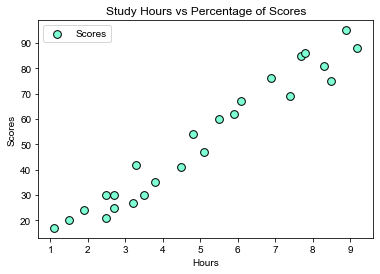

In [5]:
# Study hours and percentage of scores plotted used scatter plot.
df.plot( 'Hours', 'Scores', kind = 'scatter',s=60,  color = '#7FFFD4', edgecolors='black' )
plt.title('Study Hours vs Percentage of Scores')
plt.legend(['Scores'])
plt.style.use('seaborn-darkgrid')
plt.show()
# in order to figure out the relationship between the variables i have plotted scatter plot 
# from this plot we can conclude that the more the study hours more is the percentage

#### Observations:
From the scatter plot, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the Data Model

In [6]:
# Splitting the dataframe into attributes and labels

X = df[['Hours']].values
print(X)
y = df['Scores'].values
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [7]:
# spltting the data into traning and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [8]:
# 80% of the data for training

len(X_train)

20

In [9]:
# 20% of the data for testing

len(X_test)

5

  ## Training the Algorithm

In [10]:
# Creating an Linear Regression object and fitting x_train and y_models paramenters into the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

## Plotting the Reggression Line

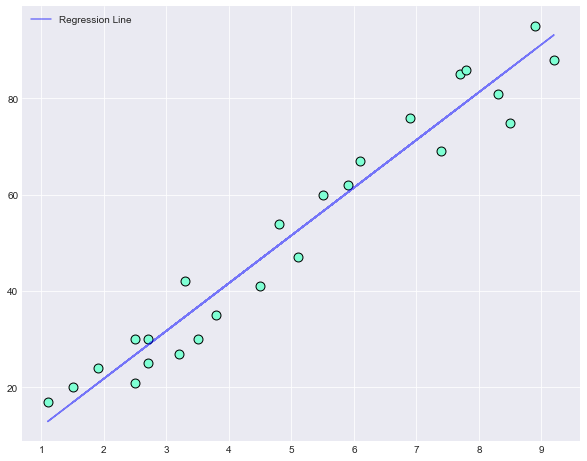

In [11]:
line = regressor.coef_*X+regressor.intercept_
fig = plt.figure(figsize=(10, 8))
plt.scatter(X, y,s=80, color = '#7FFFD4',edgecolors='black')
plt.plot(X, line, color = 'blue',alpha = 0.5)
plt.legend(['Regression Line'])
plt.show()

## Making Predictions and Testing the Model

In [12]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
# Creating a dataframe with actual vs predicted percentages 
sample = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
sample

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# let p be actual_scores of the sample
p = X_test.flatten()
p

array([1.5, 3.2, 7.4, 2.5, 5.9])

## Plotting Actual vs Predicted Scores along the Regression line

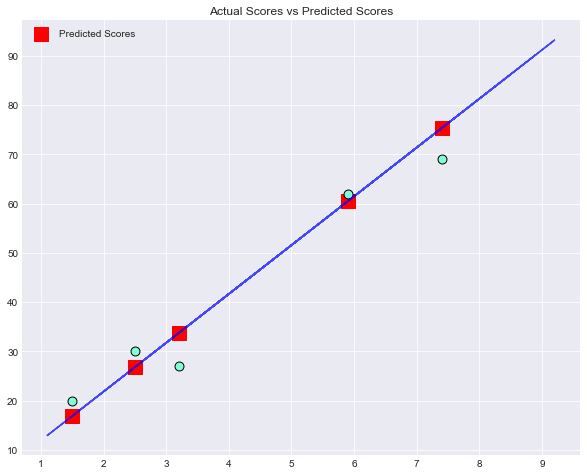

In [22]:
line = regressor.coef_*X+regressor.intercept_
fig = plt.figure(figsize=(10, 8))
plt.scatter(p, y_pred ,s=200,color = 'red', marker = 's')
plt.legend(['Predicted Scores'])
plt.plot(X, line, color = 'blue',alpha = 0.7)
plt.scatter(p, y_test ,s=80,  color = '#7FFFD4', edgecolors='black')
plt.title('Actual Scores vs Predicted Scores')
plt.show()

## Model Evaluation 

In [21]:
from sklearn import metrics  
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 4.183859899002975
Mean Squared Error (MSE): 21.5987693072174
Root Mean Squared Error (RMSE): 4.6474476121003665
R^2: 0.9454906892105356


#### Observations:
1. MAE measures the average magnitude of the errors in a set of predictions
2. R^2 tells us how close are the data points to the regression line. With around 94% we can conclude that the above model is
    perfectly fit to the data.
3. Root Mean Squared Error is the average deviation of the predictions from the observations.

## Score Prediction
### Task : What will be the predicted score if a student studies for 9.25 hrs/ day? 

In [ ]:
N = eval(input('Enter study hours:'))
result = regressor.predict([[N]])
print("Number of Hours", N)
print("Predicted score", result)